Вы аналитик авиакомпании, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
data_model = pd.read_csv('/datasets/query_1.csv')
data_city = pd.read_csv('/datasets/query_3.csv')

In [3]:
data_model = data_model.sort_values(by = 'flights_amount',
ascending = False)
data_model

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
data_model.dtypes

model             object
flights_amount     int64
dtype: object

In [5]:
data_city = data_city.sort_values(by = 'average_flights',
ascending = False) 
data_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


In [6]:
data_city.dtypes

city                object
average_flights    float64
dtype: object

### Вывод: 
Типы данных в наборах соответствуют содержанию

In [7]:
# Выберем топ-10 городов по количеству рейсов
top10 = data_city.head(10)
top10 = top10.reset_index(drop=True)
top10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


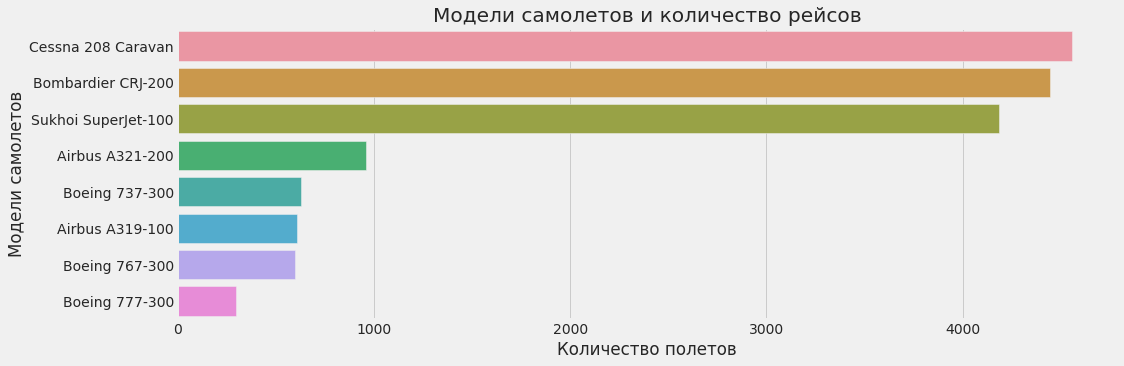

In [8]:
#Построим график «Модели самолётов и количество рейсов»:
plt.figure(figsize=(15,5))
plt.title("Модели самолетов и количество рейсов")
sns.barplot(y=data_model['model'], x=data_model['flights_amount'])
plt.ylabel("Модели самолетов")
plt.xlabel("Количество полетов")
plt.show()

На первом месте самолет Cessna - Экипаж самолёта состоит из одного пилота, базовая модель перевозит девять пассажиров. На втором месте Bombardier - бизнес-джет. Скорее всего эти полеты были связаны именно с бизнесом или с личными потребностями очень небольшого круга лиц, т.к. самолет находился в личной собственности или собственности компании. Логично, что кол-во полетов на них занимает первое место, т.к. парк этих самолетов огромен и полеты осуществляются достаточно регулярно и по несколько раз в день. Boeing 777 наоборот уже достаточно редко встретишь, поэтому этот самолет занимает последнее место. Предлагаю делать ставку на Суперджет-100 и Эйрбас, т.к. среди крупных самолетов пассажиры чаще всего летают на них.

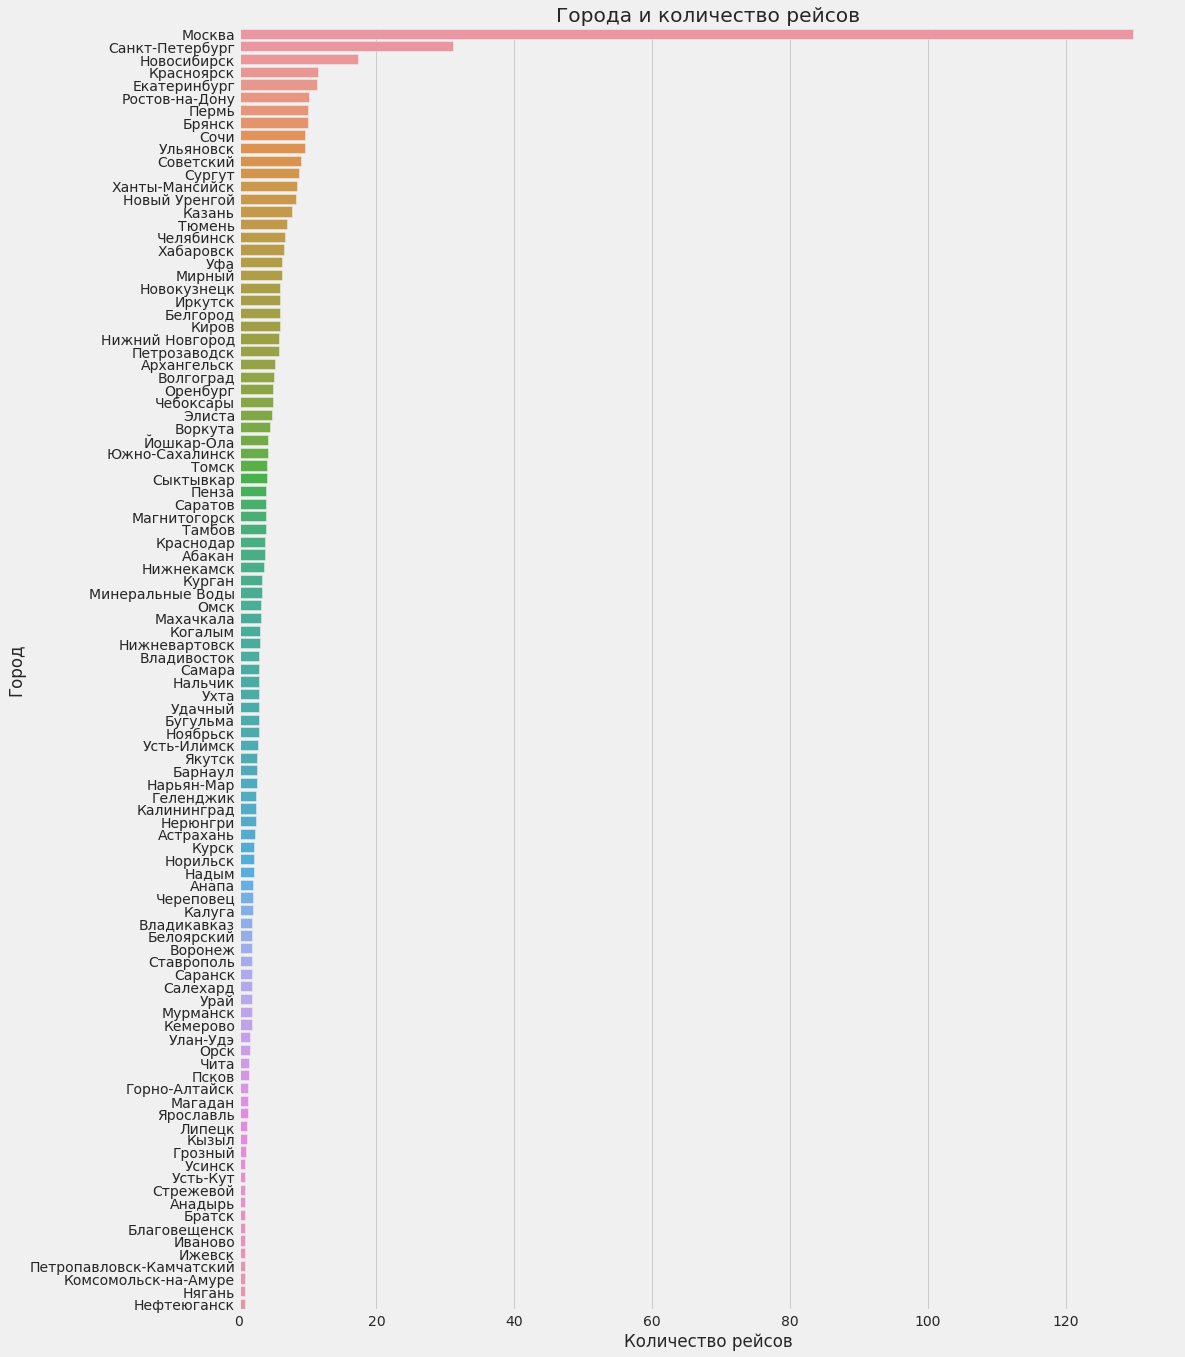

In [9]:
#Построим график «Города и количество рейсов»
plt.figure(figsize=(15,22))
plt.title("Города и количество рейсов")
sns.barplot(x=data_city['average_flights'], y=data_city['city'])
plt.xlabel("Количество рейсов")
plt.ylabel("Город")
plt.show()

Вывод: Москва на первом месте с огромным отрывом, потом Питер и Новосибирск. В аутсайдерах целая плеяда городов от Грозного до Нефтеюганска, которая врядли проводит крупные фестивали и имеющие 1 рейс день. На лицо очень сильный дисбаланс. Все скорее всего летают в Москву и обратно в свое родовое поместье.

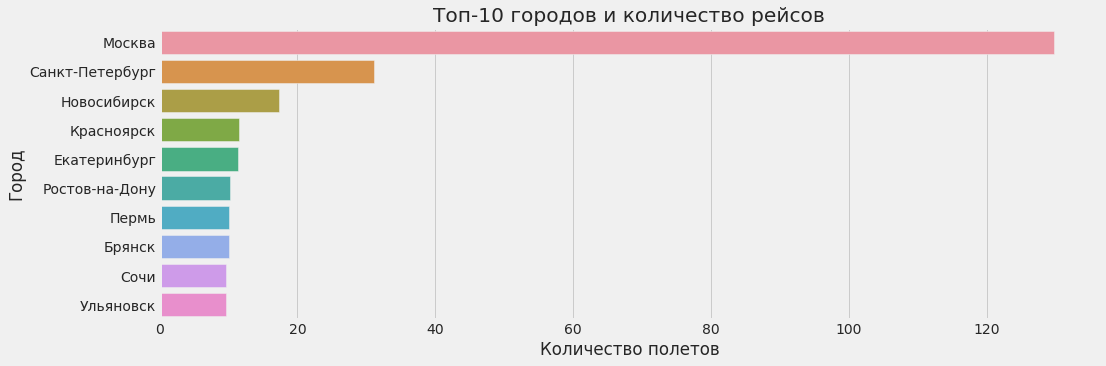

In [10]:
#Построим график «Топ-10 городов и количество рейсов»
plt.figure(figsize=(15,5))
plt.title("Топ-10 городов и количество рейсов")
sns.barplot(y=top10['city'], x=top10['average_flights'])
plt.ylabel("Город")
plt.xlabel("Количество полетов")
plt.show()

Москва более чем в 12 опережает Ульяновск, который замыкает топ-10. Дисбаланс виден и в топ-10. Одна Москва имеет больше рейсов, чем все остальные города из топ-10 вместе взятые. 

# 2. Проверка гипотезы

In [11]:
last = pd.read_csv('/datasets/query_last.csv')
last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

Сформулируем нулевую гипотезу: средние значения количества проданных билетов за неделю во время фестивалей и в обычное время равны. 

Сформулируем альтернативную гипотезу:средние значения количества проданных билетов за неделю во время фестивалей и в обычное время не равны.

In [12]:
# Найдем дисперсию по выборкам. Начнем с фестивалей:
np.var(last.query('festival_name == festival_name')['ticket_amount'])


12998464.888888888

In [13]:
# Найдем дисперсию по выборке в обычное время:
np.var(last.query('festival_name != festival_name')['ticket_amount'])

14694.408163265309

 Дисперсии существенно различаются, поэтому укажем equal_val=False.

In [15]:
# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
# применим метод scipy.stats.ttest_ind()

from scipy import stats as st
sample_1 = last.query('festival_name == festival_name')['ticket_amount'] # sample_1 - выборка из кол-ва проданных билетов во время фестивалей
sample_2 = last.query('festival_name != festival_name')['ticket_amount'] # sample_2 - выборка из кол-ва проданных билетов в обычное время
alpha = 0.05 # пороговое значение для p-value, при котором еще нельзя отбрасывать нулевую гипотезу. Ниже уже отбрасываем.
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение True. Укажем False, т.к. дисперсии различаются.
print('p-значение: ', results.pvalue)
if alpha <= results.pvalue:
    print ('Не отвергаем нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу')

p-значение:  0.377432493172683
Не отвергаем нулевую гипотезу


Вывод: p-значение близко к 38%. Таким образом вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна, близка к 38%. В связи с этим у нас нет оснований отвергать нулевую гипотезу: средние значения количества проданных билетов за неделю во время фестивалей и в обычное время равны. В целом, это логично, т.к. большинство значений количество проданных билетов находится около 51 тыс. вне зависимости от того, проходит фестиваль или нет.

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод